EXPLORATORY DATA ANALYSIS of the NETFLIX DATASET using python libraries :- Numpy, Pandas, Matplotlib, Seaborn 

Downloaded the Netflix dataset from Kaggle.

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [6]:
netflix = pd.read_csv('/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

THEREFORE THERE ARE 8807 SHOWS/MOVIES 

Q) WHICH TYPE (MOVIES/SHOWS) ARE MORE FREQUENT ON NETFLLX ?

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

*MOVIES ARE MORE FREQUENT ON NETFLIX*

Q ) WHICH COUNTRY PRODUCES THE MOST MOVIES ? 

In [ ]:
netflix['country'].value_counts()[0:10]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

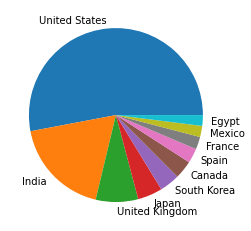

In [ ]:
#pie chart 
value = netflix['country'].value_counts()[0:10]
plt.pie(value, labels =netflix['country'].value_counts()[0:10].keys() )
plt.show()

SO NOW LETS WORK A LITTLE WITH THE DATASET 

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

LET US REMOVE THE DUPLICATE RECORDS  FROM THE DATASET 

In [ ]:
netflix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [ ]:
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


it means no duplicate entries  

CHECK WHETHER THERE IS ANY NULL VALUE IN THE DATASET 

In [ ]:
netflix.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

SHOW THE NULL VALUE IN THE HEAT MAP || heat map shows the magnitude of a phenomenon, the phenomenon here being the null values in any volumn 

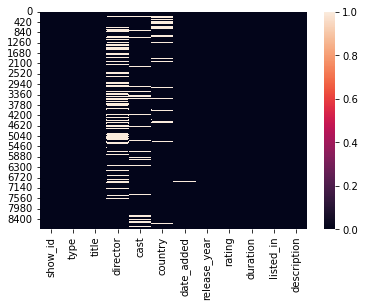

In [ ]:
sns.heatmap(netflix.isnull())
plt.show()

*QUESTION PARTS* 

Q.1) FOR '*HOUSE OF CARDS*', WHAT IS THE SHOW ID AND WHO IS THE DIRECTOR ? 

In [ ]:
#we can use str.contains() function the extract the values from the dataset 
netflix[netflix['title'].str.contains('House of Cards')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


therefore the show id is s1060 and director is not available 

Q.2) IN WHICH YEAR HIGHEST NUMBER OF TV SHOWS AND MOVIES WERE RELEASED ? SHOW BAR GRAPH 

In [ ]:
#we will check the data_type of released date
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#change the date_added datatype
netflix['release_date']=pd.to_datetime(netflix['date_added'])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [ ]:
netflix['release_date'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: release_date, Length: 1714, dtype: int64

In [ ]:
#the above one is showing date wise now since we want year wise we will add dt.year
netflix['release_date'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: release_date, dtype: int64

therefore 2019 had the highest number of releases

BAR GRAPH 

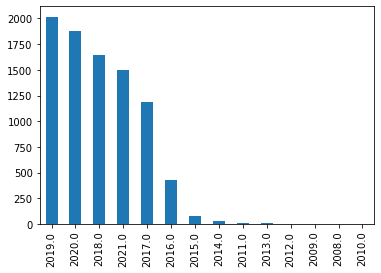

In [ ]:
netflix['release_date'].dt.year.value_counts().plot(kind='bar')

Q.3) TOTAL HOW MANY MOVIES AND TV SHOWS ARE IN THE DATASET ? SHOW WITH THE BAR GRAPH 

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

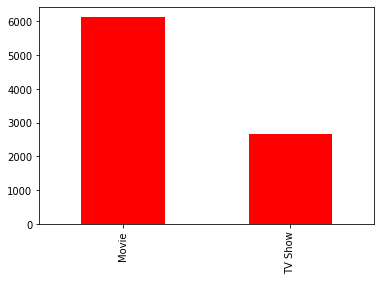

In [ ]:
netflix['type'].value_counts().plot(kind='bar',color='r')

Q.4) SHOW ALL THE MOVIES THAT WERE RELEASED IN THE YEAR 2000

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


now filter the data as per the requirement which is the year 2000 

In [ ]:
netflix[(netflix['type']== 'Movie') & (netflix['release_year']==2000)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",2021-09-01
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,2021-08-01
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",2021-08-01
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,2021-07-01
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",2021-07-01
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",2021-06-02
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021-05-01
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,2019-10-01
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,2018-10-02
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...,2018-08-02


Q.5) SHOW TITLES OF ALL THE MOVIES THAT WERE RELEASED IN *INDIA* ONLY ? 

In [ ]:
netflix[(netflix['type']=='TV Show') & (netflix['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2021-09-15
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2021-09-15
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,"September 15, 2021",2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,2021-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,NaN,NaN,India,"May 25, 2019",2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,2019-05-25
8235,s8236,TV Show,The Calling,Bumpy,NaN,India,"April 1, 2019",2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,2019-04-01
8321,s8322,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,"June 1, 2017",2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017-06-01
8349,s8350,TV Show,The House That Made Me,NaN,Vinay Pathak,India,"March 31, 2017",2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",2017-03-31


In [ ]:
#we just want their title 
netflix[(netflix['type']=='TV Show') & (netflix['country']=='India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

Q.6) SHOW TOP 10 DIRECTORS WHO GAVE HIGHEST NUMBER OF MOVIES AND TV SHOWS ON NETFLIX ? 


In [ ]:
netflix['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

Q.7) SHOW ALL THE RECORDS WHERE TYPE IS *MOVIE* AND (LISTED IN *COMEDIES* OR COUNTR YS *UNITED KINGDOM*)

In [ ]:
netflix[(netflix['type']=='Movie')& (netflix['listed_in']=='Comedies') | (netflix['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021-09-17
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017-03-31
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017-03-31
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017-11-04
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01


Q.8) IN HOW MANY MOVIES / SHOWS , *TOM CRUISE* WAS CAST  ?

In [ ]:
netflix[(netflix['cast']=='Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date


we can't use this syntax cuz there isnt a single show or movie where only tom cruise is casted so we will use the 'str.contains()' function

In [ ]:
#so here it shows that their are null values in the cast column so now we will remove those 
#dropna(), drops all the null values 
netflix_new = netflix.dropna()
netflix_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21


In [ ]:
netflix_new[netflix_new['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_date
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01


Q.9) WHAT ARE THE DIFFERENT *RATINGS* GIVEN BY NETFLIX ?

In [ ]:
netflix['rating'].value_counts().keys()

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object')

Q.10) HOW MANY *MOVIES* GOT THE '*TV-14*' RATING IN *CANADA* ? 

In [ ]:
netflix[(netflix['type']=='Movie')& (netflix['rating']=='TV-14')& (netflix['country']=='Canada')].value_counts()

show_id  type   title                                        director                                cast                                                                                                                                                                     country  date_added         release_year  rating  duration  listed_in                                              description                                                                                                                                             release_date
s158     Movie  Level 16                                     Danishka Esterhazy                      Katie Douglas, Celina Martin, Peter Outerbridge, Sara Canning, Alexis Whelan, Amalia Williamson, Josette Halpert, Kiana Madeira                                          Canada   September 1, 2021  2018          TV-14   102 min   Sci-Fi & Fantasy, Thrillers                            In a bleak academy that teaches girls the virtues of passivity, t

Q.10) HOW MANY TV SHOWS GOT R RATING AFTER THE *YEAR 2018* ?

In [ ]:
netflix[(netflix['type']=='TV Show')&(netflix['rating']=='R')&(netflix['release_year']>2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Q.11) WHAT IS THE MAXIMUM DURATION OF ANY MOVIE/SHOW ON NETFLIX ? 

In [ ]:
netflix['duration'].value_counts()[0:3]

1 Season     1793
2 Seasons     425
3 Seasons     199
Name: duration, dtype: int64

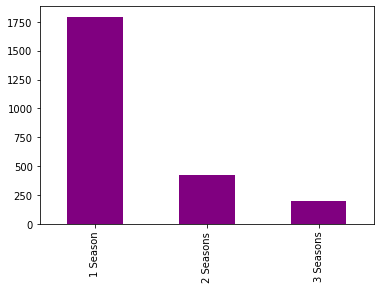

In [10]:
#barplot 
netflix['duration'].value_counts()[0:3].plot(kind='bar',color='purple')